In [1]:
#Importing all Necessary libraries For EDA

import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading Required Data

data_train = pd.read_csv('Training_Dataset_v2.csv')

In [3]:
data_train.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
sku                  1687861 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null object
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null object
oe_constraint        1687860 non-null object
ppap_risk        

In [5]:
data_train.shape

(1687861, 23)

In [6]:
#Basic Builtin EDA functions are pretty handy sometimes
data_train.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


## Observations:::


- We are getting 0 as forecasting in all three forecasts from min to 50% .i.e. 3,6,9 months
- So I dont think forecasting is done in quite a right way.
- Any way we now just want tok know about missing values


In [7]:
statistics_of_data = []
for col in data_train.columns:
  statistics_of_data.append((col,
                             data_train[col].nunique(),
                             data_train[col].isnull().sum()*100/data_train.shape[0],
                             data_train[col].value_counts(normalize=True, dropna=False).values[0] * 100, 
                             data_train[col].dtype
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Feature', 'Uniq_val', 'missing_val', 'val_biggest_cat', 'type'])

In [8]:
stats_df.sort_values('missing_val', ascending=False)

,Feature,Uniq_val,missing_val,val_biggest_cat,type
2,lead_time,32,5.977625,40.417191,float64
11,min_bank,5568,0.000059,51.682633,float64
12,potential_issue,2,0.000059,99.946204,object
21,rev_stop,2,0.000059,99.956631,object
20,stop_auto_buy,2,0.000059,96.380804,object
19,ppap_risk,2,0.000059,87.923472,object
18,oe_constraint,2,0.000059,99.985425,object
17,deck_risk,2,0.000059,77.042896,object
16,local_bo_qty,654,0.000059,98.617007,float64
15,perf_12_month_avg,102,0.000059,7.845729,float64


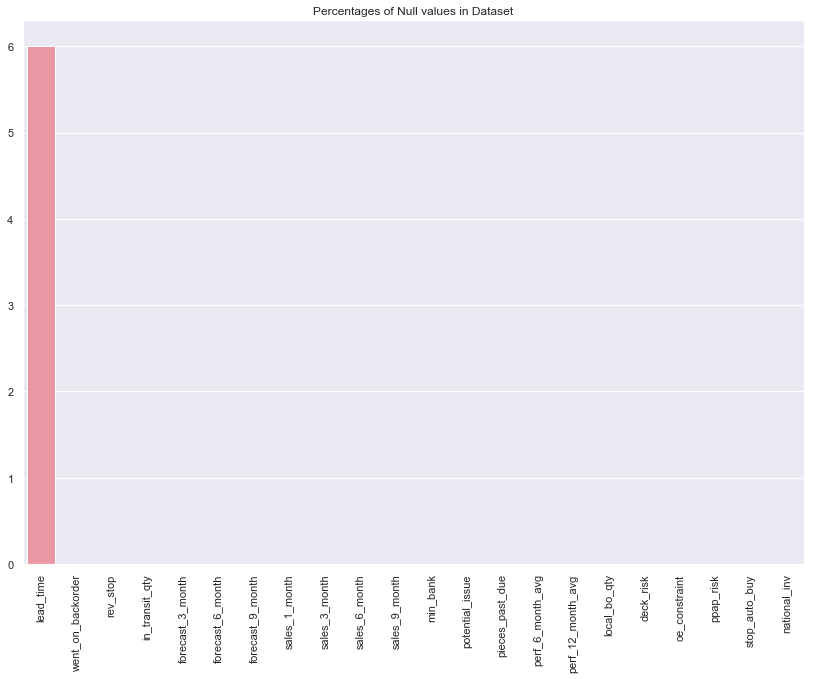

In [9]:
# Plotting Null Values for better Visualization

def plotNull_Values(dataset):
    null_Values = (dataset.isnull().sum() / len(dataset)) * 100
    
    try:
        # droping columns having null percentage to 0
        null_Values = round(null_Values.drop(null_Values[null_Values == 0].index)).sort_values(ascending = False)
        
        # plotting the bar plot of NULL %
        plt.figure(figsize = (14,10))
        null_plot = sns.barplot(x = null_Values.index , y = null_Values)
        plt.xticks(rotation = "90")
        plt.title("Percentages of Null values in Dataset")
        plt.show()
                
    except:
        print("There is NO null values in the dataset")
        print("Returning the dataset....")
        return dataset
    
    return null_plot

plotNull_Values(data_train)

## Observations:

- 1 record is being missing in whole dataset, we need to remove that one
- almost 6% missing values are presnt in lead_time

In [10]:
#Removing unwanted columns

data_train.drop(['sku'],axis=1,inplace =True)

In [11]:
data_train = data_train.dropna()

In [12]:
data_train.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [13]:
data_train['went_on_backorder'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
combine = [data_train]
titlemapping = {'Yes':1,'No':0}

for row in combine:
    row['went_on_backorder'] = row['went_on_backorder'].map(titlemapping)
    row['went_on_backorder'].astype(int)

In [15]:
data_train.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [16]:
#Now We will perform some statisitics

# Applying Some Statistical Test
class Statistical_tests:
    def __init__(self, train):
        self.train = train
        
    # ---------------------------- FUNCTION 1: ANOVA ---------------------------------#
    def Anova(self):
        from scipy import stats
        Numeric_features = self.train.select_dtypes(exclude = 'O').columns
        print(Numeric_features)
        categoric_features = self.train.select_dtypes(exclude = [np.number]).columns
        data_train[categoric_features] = data_train[categoric_features].fillna("missing")
        print(categoric_features)

        # Making the ANOVA
        anova = {"feature":[], "f":[], "p":[]}
        for cat in data_train[categoric_features]:
            group_prices = []
    
            for group in data_train[cat].unique():
                #print("Group"+group)
                #print(data_train[data_train[cat] == group])
                group_prices.append(data_train[data_train[cat] == group]["went_on_backorder"].values)
            
            f, p = stats.f_oneway(*group_prices)
            anova['feature'].append(cat)
            anova['f'].append(f)
            anova['p'].append(p)

        anova = pd.DataFrame(anova)
        anova = anova[["feature","f","p"]]
        anova.sort_values("p", inplace = True)
        

        return anova

In [17]:
# Accessing the Class + method
sts = Statistical_tests(data_train)
sts.Anova()

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'went_on_backorder'],
      dtype='object')
Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop'],
      dtype='object')


,feature,f,p
0,potential_issue,323.912202,2.070028e-72
3,ppap_risk,129.161728,6.267863e-30
1,deck_risk,81.211601,2.030140e-19
2,oe_constraint,23.654159,1.153075e-06
4,stop_auto_buy,9.862746,1.686623e-03
5,rev_stop,2.854353,9.112709e-02


In [18]:
# Since all p value is greater than 0.05, we are accepting null hypothesis here.

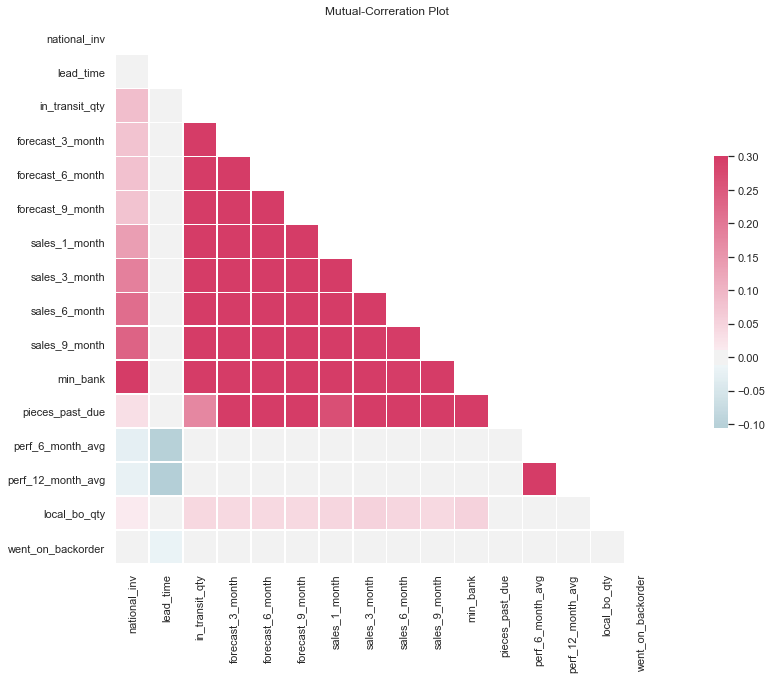

----------------------------------------
Number of Correlated features: 7
List of Correlated Features: ['min_bank', 'forecast_6_month', 'forecast_9_month', 'sales_6_month', 'sales_9_month', 'perf_12_month_avg', 'sales_3_month']
----------------------------------------
            feature_1          feature_2  correration
0    forecast_6_month   forecast_9_month     0.994945
1    forecast_9_month   forecast_6_month     0.994945
2    forecast_6_month   forecast_3_month     0.990500
3    forecast_3_month   forecast_6_month     0.990500
4       sales_3_month      sales_6_month     0.988228
5       sales_6_month      sales_3_month     0.988228
6    forecast_3_month   forecast_9_month     0.977347
7    forecast_9_month   forecast_3_month     0.977347
8       sales_6_month      sales_9_month     0.973914
9       sales_9_month      sales_6_month     0.973914
10      sales_3_month      sales_9_month     0.954860
11      sales_9_month      sales_3_month     0.954860
12      sales_6_month   forec

In [19]:
#Now lets implement Pearson Corelation Coefficient

# Correration-Coefficient class
class Correlation:
    def __init__(self, dataset):
        self.dataset = dataset
        
    
    # ------------------------ FUNCTION 1: CORRERATION-COEFFICIENT ------------------------#
    # Making a Correration-coefficient plot
    def correlation_coefficient(self):
        # taking only numeric columns + corr_matrix
        numeric_features = self.dataset.select_dtypes(include = [np.number])
        corr_matrix = numeric_features.corr()
        
        # Setting style + mask + axes + custom_cmap
        sns.set(style = "white")
        mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))
        f, ax = plt.subplots(figsize = (20, 10))
        cmap = sns.diverging_palette(220, 1, as_cmap=True)
        
        # Setting the Heatmap
        sns.heatmap(data = corr_matrix, 
                    mask=mask, 
                    cmap=cmap, 
                    vmax=.3, 
                    center=0,
                    square=True, 
                    linewidths=.5, 
                    cbar_kws={"shrink": .5})
        
        plt.title("Mutual-Correration Plot")
        plt.show()
    
    # ----------------------- FUNCTION 2: CORRERATED-FEATURES ---------------------------#
    # Getting the list of Correlated features
    def select_correlation(self):
        # making a set
        corr_set = set()
    
        # making a corr matrix
        corr_matrix = self.dataset.corr()
    
        # select value under some threshold
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i,j]) > 0.8:
                    matrix = corr_matrix.columns[i]
                
                    # adding the values in set
                    corr_set.add(matrix)
    
        print("-"*40)
        print("Number of Correlated features: {}".format(len(corr_set)))
        print("List of Correlated Features: {}".format(list(corr_set)))
        print("-"*40)
    
    
    # --------------------- FUNCTION 3: FEATURES-CORRERATION ----------------------------#
    def feature_correlation(self):
        corr_matrix = self.dataset.corr()
        corr_matrix = corr_matrix.abs().unstack()
        corr_matrix = corr_matrix.sort_values(ascending = False)
    
        #select values of corr_matrix above the threshold set
        corr_matrix = corr_matrix[(corr_matrix >= 0.8) & (corr_matrix < 1)]
    
        corr_matrix = pd.DataFrame(corr_matrix).reset_index()
        corr_matrix.columns = ["feature_1","feature_2", "correration"]
    
        print(corr_matrix)
    
    #------------------------------------------------------------------------------------#
        
# Accessing the Correration Class + methods
corr_class = Correlation(data_train)
corr_class.correlation_coefficient()
corr_class.select_correlation()
corr_class.feature_correlation()

From the above plot, I can conclude that there are total of 7 variables correrated with each other, which adds redundent information in our dataset.
Multicoliniear causes affect the accuracy of linear models like SVM, Multiple Regression etc..

In [20]:
data_train.shape

(1586967, 22)

In [21]:
#Now seperate out numerical and categorical data from our given dataset
Numeric_features = data_train.select_dtypes(exclude = 'O').columns
print(Numeric_features)
categoric_features = data_train.select_dtypes(exclude = [np.number]).columns
print(categoric_features)

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'went_on_backorder'],
      dtype='object')
Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop'],
      dtype='object')


In [22]:
#Now seperating out continous and discrete features from numeric features

discrete_feature = [feature for feature in Numeric_features if len(data_train[feature].unique())<25]
print(len(discrete_feature))
discrete_feature

1


['went_on_backorder']

In [23]:
continous_feature = [feature for feature in Numeric_features if feature not in discrete_feature ]
print("Continuous feature Count {}".format(len(continous_feature)))
data_train[continous_feature].head()

Continuous feature Count 15


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
5,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.82,0.87,0.0
7,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
9,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.82,0.87,0.0


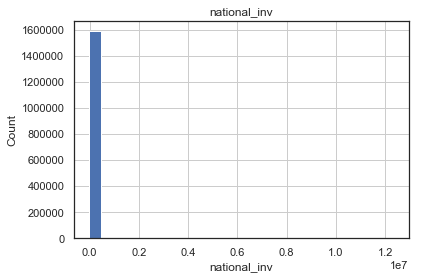

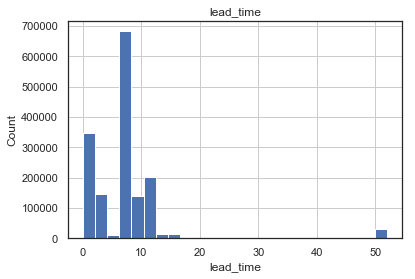

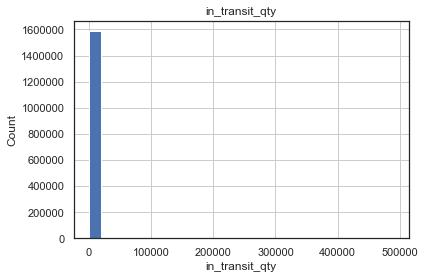

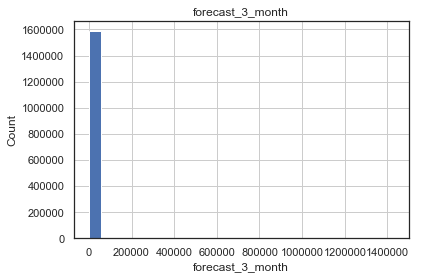

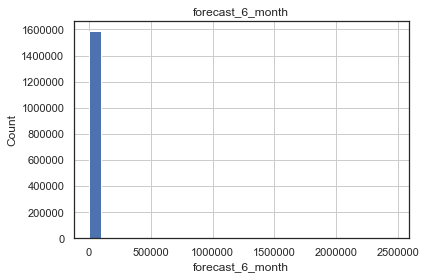

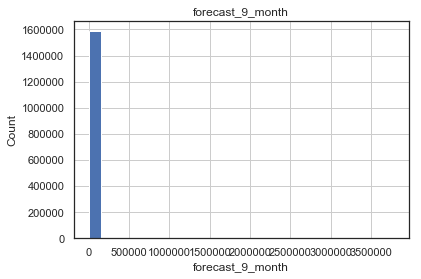

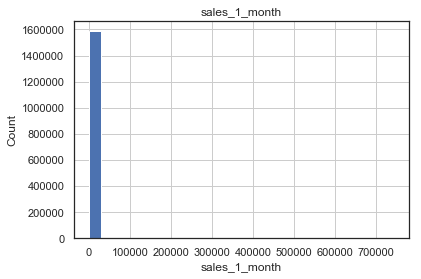

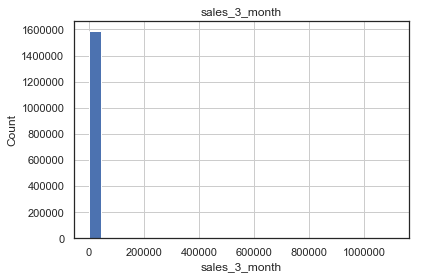

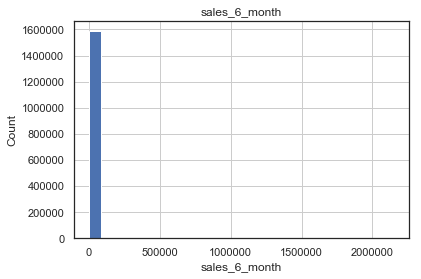

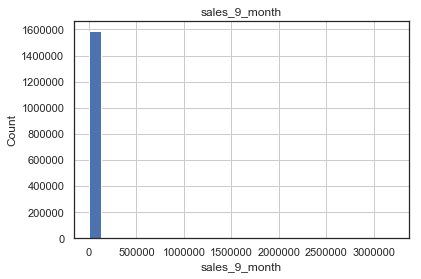

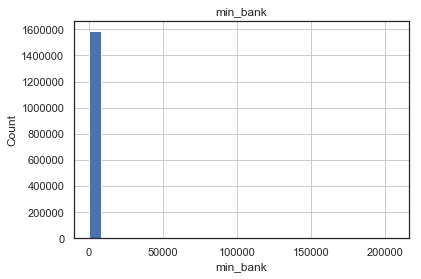

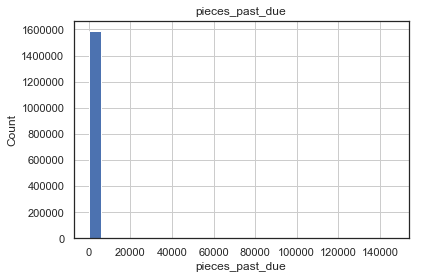

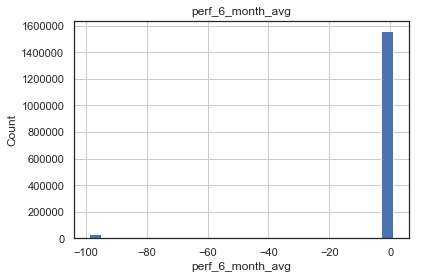

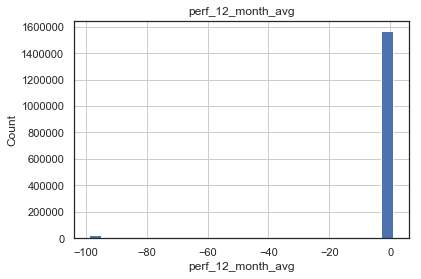

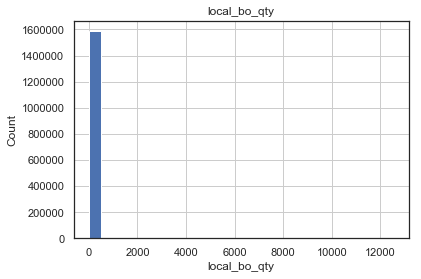

In [24]:
#Now lets visualize the histogram of all continous features

for feature in continous_feature:
    data = data_train.copy()
    data[feature].hist(bins=25)
    #data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Text(0.5, 1.0, 'Count For Potential Issues')

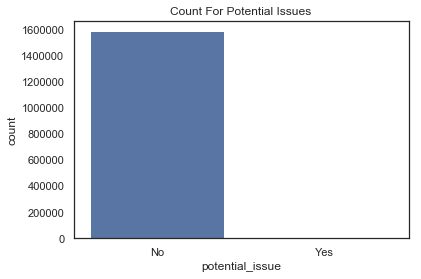

In [25]:
## Find out the relationship between categorical variable and dependent feature Backorder
## ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk','stop_auto_buy', 'rev_stop']

sns.countplot(data_train['potential_issue'])
fig=plt.gcf()
#fig.set_size_inches(20,14)
plt.title('Count For Potential Issues')

Text(0.5, 1.0, 'Count For deck_risk')

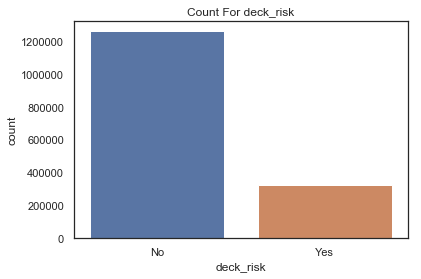

In [26]:
sns.countplot(data_train['deck_risk'])
fig=plt.gcf()
#fig.set_size_inches(20,14)
plt.title('Count For deck_risk')

Text(0.5, 1.0, 'Count For oe_constraint')

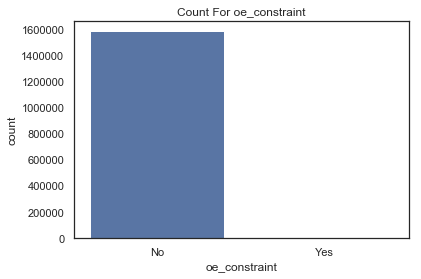

In [27]:
sns.countplot(data_train['oe_constraint'])
fig=plt.gcf()
#fig.set_size_inches(20,14)
plt.title('Count For oe_constraint')

Text(0.5, 1.0, 'Count For ppap_risk')

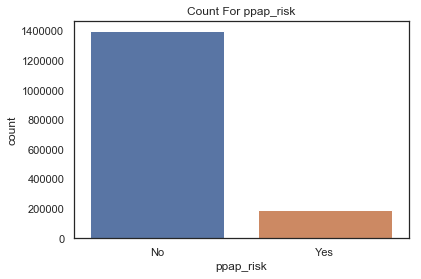

In [28]:
sns.countplot(data_train['ppap_risk'])
fig=plt.gcf()
#fig.set_size_inches(20,14)
plt.title('Count For ppap_risk')

Text(0.5, 1.0, 'Count For stop_auto_buy')

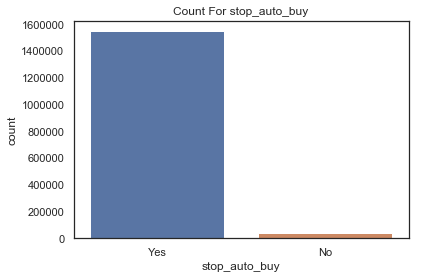

In [29]:
sns.countplot(data_train['stop_auto_buy'])
fig=plt.gcf()
#fig.set_size_inches(20,14)
plt.title('Count For stop_auto_buy')

Text(0.5, 1.0, 'Count For rev_stop')

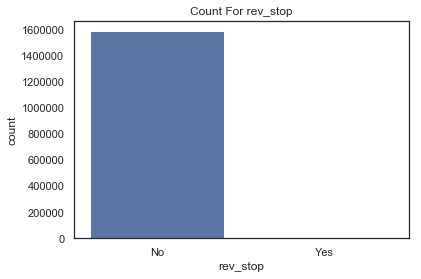

In [30]:
sns.countplot(data_train['rev_stop'])
fig=plt.gcf()
#fig.set_size_inches(20,14)
plt.title('Count For rev_stop')

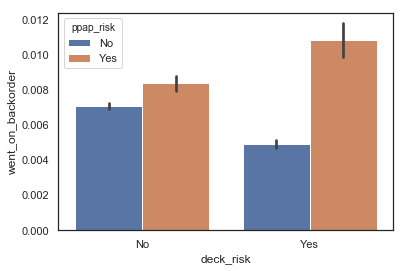

In [31]:
sns.barplot('deck_risk','went_on_backorder',hue = 'ppap_risk',data=data_train)

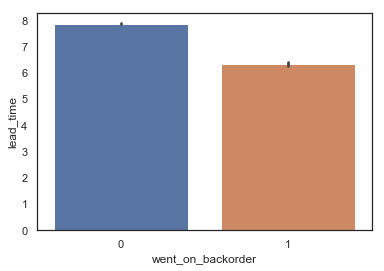

In [32]:
sns.barplot('went_on_backorder','lead_time',data=data_train)

In [33]:
#Now I need to transform all my categorical data through OHE and then scaling all data

In [34]:
categoricalVariable = [feature for feature in data_train.columns if data_train[feature].dtype == 'O' ]
len(categoricalVariable)

6

In [35]:
data_train[categoricalVariable].head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
1,No,No,No,No,Yes,No
3,No,No,No,No,Yes,No
5,No,No,No,No,Yes,No
7,No,Yes,No,Yes,Yes,No
9,No,No,No,No,Yes,No


In [36]:
data_train['potential_issue'] = pd.get_dummies(data_train['potential_issue'],drop_first=True)
data_train['deck_risk'] = pd.get_dummies(data_train['deck_risk'],drop_first=True)
data_train['oe_constraint'] = pd.get_dummies(data_train['oe_constraint'],drop_first=True)
data_train['ppap_risk'] = pd.get_dummies(data_train['ppap_risk'],drop_first=True)
data_train['stop_auto_buy'] = pd.get_dummies(data_train['stop_auto_buy'],drop_first=True)
data_train['rev_stop'] = pd.get_dummies(data_train['rev_stop'],drop_first=True)


In [37]:
data_train.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
5,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,0
7,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,1,0,1,1,0,0
9,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,0


In [38]:
X = data_train.drop(['went_on_backorder'],axis =1,)
y = data_train['went_on_backorder']

In [39]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X),columns=X.columns)

X_scaled

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3)

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier()

In [43]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
rf.score(x_train,y_train)

0.9996102175220276

In [45]:
rf.score(x_test,y_test)

0.994608173647475

In [46]:
#Now with hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
#Now lets do this with Kfold cross validation
from sklearn.model_selection import cross_val_score
#rf_random.fit(xtrain,ytrain)
cross_val_score(rf_random,X_scaled,y,cv=5)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
#Saving Model Using Pickle
import pickle

In [ ]:
# save the modelrf_randomto disk
pickle.dump(rf_random, open("RandomForestModelForBackOrder.pickle.dat", "wb"))